In [46]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [47]:
import pandas as pd
import numpy as np

**Importing the dataset**

In [48]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [49]:
df.drop("User ID",axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [50]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'EstimatedSalary']]
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Feature Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train, y_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [52]:
from sklearn import neighbors,metrics
i=1
knn = neighbors.KNeighborsClassifier(n_neighbors=i)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Predicting the Test set results**

In [57]:

predict=knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predict)
print(accuracy)
predict

0.7916666666666666


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [56]:
train_acc = metrics.accuracy_score(y_train, knn.predict(X_train))
test_acc = metrics.accuracy_score(y_test, predict)

print("Train set Accuracy: {:.4f}".format(train_acc))
print("Test set Accuracy: {:.4f}".format(test_acc))

Train set Accuracy: 0.9964
Test set Accuracy: 0.7917


**Making the Confusion Matrix**

<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

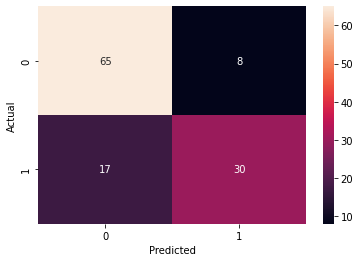

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_matrix(y_test,predict)
confusion_matrix = pd.crosstab(y_test, predict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
